# Data Import

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as data_split

In [2]:
X,y = datasets.make_moons(n_samples=1000, noise=.05,random_state=1004)
X

array([[-0.19096819,  0.9276742 ],
       [-0.02020182,  0.94239234],
       [ 0.60740453, -0.35453297],
       ...,
       [ 1.04384118,  0.1225713 ],
       [ 0.01781968,  0.30061975],
       [ 1.07551734,  0.05427318]])

# K-Means algorithm

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

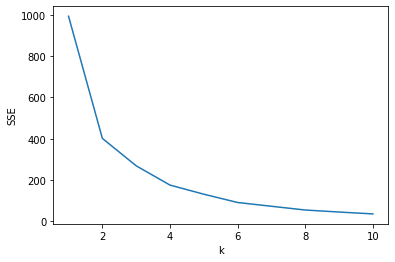

In [4]:
#Use SSE for searching optimized K
def sse(data):
    sse = []
    for i in range(1,11):
        kmeans = KMeans(i)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,11),sse)
    plt.xlabel("k")
    plt.ylabel('SSE')
    plt.show()
sse(X)

+ We can found optimized k is 2 or 4 or 10

# Test

In [5]:
import os
import pandas as pd
import numpy as np

In [6]:
os.listdir()

['Kmeans_result.csv',
 '2017315014_박장훈_KNN.ipynb',
 '2017315014_박장훈_K_means.ipynb',
 'train_dataset.csv',
 'test_dataset.csv',
 'result.csv',
 'Kmeans_result.txt',
 '.ipynb_checkpoints',
 'test_moon.csv',
 'Kmeans_predict.txt',
 '2017315014_박장훈_과제.ipynb']

In [7]:
# import test data & convert numpy array
test = pd.read_csv('test_moon.csv')
test = test.to_numpy()

In [8]:
kmeans = KMeans(2)
kmeans.fit(X)
pred = kmeans.predict(test)
print(pred)

[1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1]


In [14]:
# save to file
np.savetxt("KMeans_Result.txt", pred, fmt='%d', delimiter=',')

In [9]:
#convert test's predict values & test data to dataframe
predict =pd.DataFrame(pred)
test = pd.DataFrame(test)

In [10]:
#add values to test.csv
test['pred'] = pred

In [11]:
#save scv
test.to_csv("Kmeans_result.csv")